In [1]:
import netCDF4 as nc
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import collections
import matplotlib.font_manager
import xarray as xr
import statistics
import geodatasets

## NLDAS Data

In [2]:
# Defining path to GLDAS_NOAH10_M data
p = "/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/"

In [3]:
# Creating dataframe for only Mississippi Basin 

miss_region_df = pd.DataFrame()

#Iterating through files in path
for filename in os.listdir(p):
    try:
        #Reading in data as xarray then converting to DataFrame
        xd = xr.open_dataset(p+str(filename))
        xd_df = xd.to_dataframe()
        xd_df.reset_index(inplace=True)
        
        #Extracting only needed columns 
        int_df = xd_df[["time", "lon", "lat", "SWE_inst", 'SoilMoi0_10cm_inst',
           'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst']]    
        
        #Index where Mississippi Basin longitude/latitude coordinates are in the DataFrame
        df_slice = int_df[(int_df.lon.isin(list(np.arange(-90.5,-100,-0.5)))) & (int_df.lat.isin(list(np.arange(30.5,40,0.5))))]
        miss_region_df = pd.concat([miss_region_df, df_slice], axis=0)
        
    except:
        pass

In [4]:
#Sorting and shaping DataFrame
miss_region_df = miss_region_df.sort_values(by=['time'])
miss_region_df.reset_index(inplace=True)
miss_region_df

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
0,67449,1948-01-01,-90.5,39.5,3.806316,32.123287,92.026428,170.576889,278.188965
1,13141,1948-01-01,-92.5,31.5,2.229555,27.859627,83.313400,164.319550,260.117340
2,13140,1948-01-01,-92.5,30.5,1.618988,33.884422,101.597855,204.641144,346.735229
3,12999,1948-01-01,-93.5,39.5,8.648218,27.661360,84.057205,158.720032,252.469193
4,12998,1948-01-01,-93.5,38.5,4.152470,29.399712,90.760048,176.681396,292.177612
...,...,...,...,...,...,...,...,...,...
160795,12998,2014-12-01,-93.5,38.5,0.093266,30.214924,90.772018,181.880325,304.265106
160796,12999,2014-12-01,-93.5,39.5,0.034194,28.063148,84.597443,169.497864,283.173187
160797,13140,2014-12-01,-92.5,30.5,0.000000,32.061871,96.579048,194.730820,330.652588
160798,13142,2014-12-01,-92.5,32.5,0.000000,24.142153,72.722046,144.230743,233.939163


In [39]:
mississ_avg_df = pd.DataFrame()

for ts in list(collections.Counter(miss_region_df["time"]).keys()):
    sub_region_df = miss_region_df[miss_region_df["time"] == ts]
    mississ_avg_df = pd.concat([mississ_avg_df, sub_region_df.describe().iloc[1]], axis=1)

In [42]:
mississ_avg_df = mississ_avg_df.transpose()

In [43]:
mississ_avg_df

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
mean,39769.5,1948-01-01,-95.0,35.0,1.829879,26.013916,77.677704,141.231918,275.914001
mean,39769.5,1948-02-01,-95.0,35.0,1.082676,27.866783,82.964218,148.103241,284.956451
mean,39769.5,1948-03-01,-95.0,35.0,0.436915,28.846592,87.490021,163.193237,294.121094
mean,39769.5,1948-04-01,-95.0,35.0,0.000533,26.062387,79.469826,155.810593,288.711914
mean,39769.5,1948-05-01,-95.0,35.0,0.0,25.431299,74.906258,142.035706,277.702209
...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-08-01,-95.0,35.0,0.0,21.316051,63.217739,116.984123,260.198944
mean,39769.5,2014-09-01,-95.0,35.0,0.0,21.880833,62.999062,107.587692,250.570816
mean,39769.5,2014-10-01,-95.0,35.0,0.0,23.376719,70.432167,120.297569,250.227936
mean,39769.5,2014-11-01,-95.0,35.0,0.130912,23.874025,73.75341,132.581177,254.966522


In [44]:
trunc_nldas = mississ_avg_df[(mississ_avg_df['time'] > '2002-04-18 00:00:00') & (mississ_avg_df['time'] < '2014-12-31 00:00:00')]

In [45]:
trunc_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
mean,39769.5,2002-05-01,-95.0,35.0,0.0,27.850849,83.430878,161.056534,300.847504
mean,39769.5,2002-06-01,-95.0,35.0,0.0,26.660673,79.764427,152.99733,293.075409
mean,39769.5,2002-07-01,-95.0,35.0,0.0,25.896763,76.763695,141.349762,277.454376
mean,39769.5,2002-08-01,-95.0,35.0,0.0,24.13991,72.083038,132.881271,269.780029
mean,39769.5,2002-09-01,-95.0,35.0,0.0,22.446699,67.355751,123.209671,263.925323
...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-08-01,-95.0,35.0,0.0,21.316051,63.217739,116.984123,260.198944
mean,39769.5,2014-09-01,-95.0,35.0,0.0,21.880833,62.999062,107.587692,250.570816
mean,39769.5,2014-10-01,-95.0,35.0,0.0,23.376719,70.432167,120.297569,250.227936
mean,39769.5,2014-11-01,-95.0,35.0,0.130912,23.874025,73.75341,132.581177,254.966522


In [48]:
#Converting values to meters

trunc_nldas["SWE_inst"] = trunc_nldas["SWE_inst"]*0.001
trunc_nldas["SoilMoi0_10cm_inst"] = trunc_nldas["SoilMoi0_10cm_inst"]*0.001
trunc_nldas["SoilMoi10_40cm_inst"] = trunc_nldas["SoilMoi10_40cm_inst"]*0.001
trunc_nldas["SoilMoi40_100cm_inst"] = trunc_nldas["SoilMoi40_100cm_inst"]*0.001
trunc_nldas["SoilMoi100_200cm_inst"] = trunc_nldas["SoilMoi100_200cm_inst"]*0.001

/tmp/ipykernel_76783/839424738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_nldas["SoilMoi0_10cm_inst"] = trunc_nldas["SoilMoi0_10cm_inst"]*0.001
/tmp/ipykernel_76783/839424738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_nldas["SoilMoi10_40cm_inst"] = trunc_nldas["SoilMoi10_40cm_inst"]*0.001
/tmp/ipykernel_76783/839424738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [49]:
trunc_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
mean,39769.5,2002-05-01,-95.0,35.0,0.0,0.027851,0.083431,0.161057,0.300848
mean,39769.5,2002-06-01,-95.0,35.0,0.0,0.026661,0.079764,0.152997,0.293075
mean,39769.5,2002-07-01,-95.0,35.0,0.0,0.025897,0.076764,0.14135,0.277454
mean,39769.5,2002-08-01,-95.0,35.0,0.0,0.02414,0.072083,0.132881,0.26978
mean,39769.5,2002-09-01,-95.0,35.0,0.0,0.022447,0.067356,0.12321,0.263925
...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-08-01,-95.0,35.0,0.0,0.021316,0.063218,0.116984,0.260199
mean,39769.5,2014-09-01,-95.0,35.0,0.0,0.021881,0.062999,0.107588,0.250571
mean,39769.5,2014-10-01,-95.0,35.0,0.0,0.023377,0.070432,0.120298,0.250228
mean,39769.5,2014-11-01,-95.0,35.0,0.000131,0.023874,0.073753,0.132581,0.254967


## GRACE Data

In [5]:
grace_path = '/home/maiampow/remoteData/GRACE_NEW/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/'

In [8]:
def read_data(path, filename, data):
    try:
        if filename.endswith('nc'):
            df = xr.open_dataset(path+str(filename))
            date = pd.to_datetime(df['time'].values[0])
            data['date'].append(date)
            region = df['lwe_thickness'].sel(lat=slice(30.5, 39.5), lon=slice(270.5, 279.5))
            data['lwe_thickness'].append(region.mean().values.item())
        else:
            pass
    except Exception as e:
        print(e)
        print(path)
        print(filename)

In [9]:
data = {'date':[], 'lwe_thickness':[]}

for filename in os.listdir(grace_path):
    read_data(grace_path, filename, data)

In [10]:
df = pd.DataFrame(data)
df = df.sort_values('date')

In [12]:
df

,date,lwe_thickness
162,2002-04-18 00:00:00,0.051939
161,2002-05-10 12:00:00,0.044236
160,2002-08-16 12:00:00,-0.108040
159,2002-09-16 00:00:00,-0.120404
158,2002-10-16 12:00:00,-0.060526
...,...,...
4,2017-01-21 00:00:00,0.054049
3,2017-03-31 12:00:00,0.073723
2,2017-04-24 12:00:00,0.050132
1,2017-05-13 00:00:00,0.058987


In [37]:
trunc_grace = df[(df['date'] > '2002-01-01 00:00:00') & (df['date'] < '2014-12-31 00:00:00')]

In [38]:
trunc_grace

,date,lwe_thickness
162,2002-04-18 00:00:00,0.051939
161,2002-05-10 12:00:00,0.044236
160,2002-08-16 12:00:00,-0.108040
159,2002-09-16 00:00:00,-0.120404
158,2002-10-16 12:00:00,-0.060526
...,...,...
27,2014-06-13 00:00:00,0.034361
26,2014-08-16 12:00:00,-0.036681
25,2014-09-16 00:00:00,-0.072096
24,2014-10-16 12:00:00,-0.073428


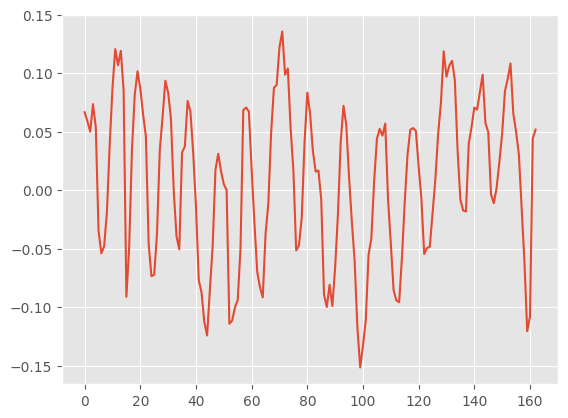

In [15]:
plt.style.use('ggplot')
plt.plot(df["lwe_thickness"])
plt.show()